Support Vector Machines : Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that best separates classes by maximizing the margin between data points of different classes. SVM is effective in high-dimensional spaces and can use kernel functions to handle non-linear boundaries.

Load Datasets(150 samples)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.svm import SVC
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target
target_names = iris.target_names  # ['setosa', 'versicolor', 'virginica']

Print Data

In [5]:
df = pd.DataFrame(X, columns=['Petal Length', 'Petal Width'])
df['Target'] = y
df['Class Name'] = df['Target'].apply(lambda i: target_names[i])

# Show a few rows from each class
print(df.groupby('Class Name').head(5))  # First 5 samples from each class

     Petal Length  Petal Width  Target  Class Name
0             1.4          0.2       0      setosa
1             1.4          0.2       0      setosa
2             1.3          0.2       0      setosa
3             1.5          0.2       0      setosa
4             1.4          0.2       0      setosa
50            4.7          1.4       1  versicolor
51            4.5          1.5       1  versicolor
52            4.9          1.5       1  versicolor
53            4.0          1.3       1  versicolor
54            4.6          1.5       1  versicolor
100           6.0          2.5       2   virginica
101           5.1          1.9       2   virginica
102           5.9          2.1       2   virginica
103           5.6          1.8       2   virginica
104           5.8          2.2       2   virginica


Decision Boundary

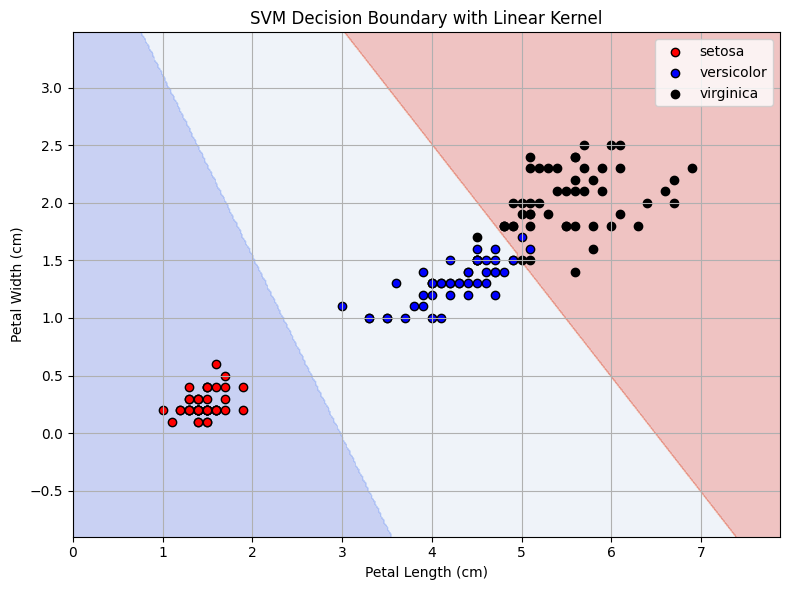

Training Accuracy: 0.96
Test Accuracy: 1.00


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and petal width
y = iris.target
target_names = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with linear kernel
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Create mesh to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot each class separately with a label
colors = ['red', 'blue', 'black']
for idx, class_name in enumerate(target_names):
    plt.scatter(X[y == idx, 0], X[y == idx, 1],
                c=colors[idx], label=class_name, edgecolors='k')

# Final plot settings
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.legend()  # Add legend to show class names
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Confusion Matrix

<Figure size 600x500 with 0 Axes>

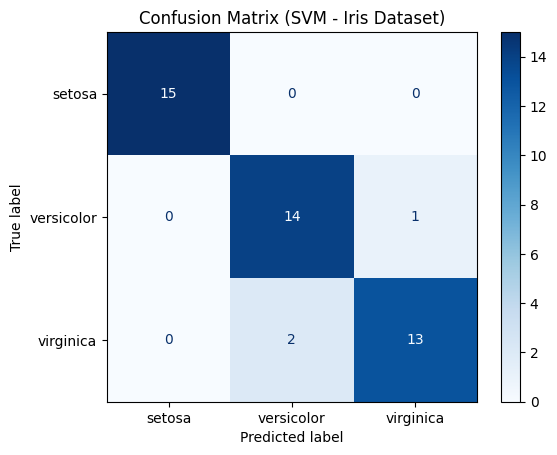

In [10]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and petal width
y = iris.target
target_names = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train an SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (SVM - Iris Dataset)")
plt.show()

Classification Report

Feature Importance

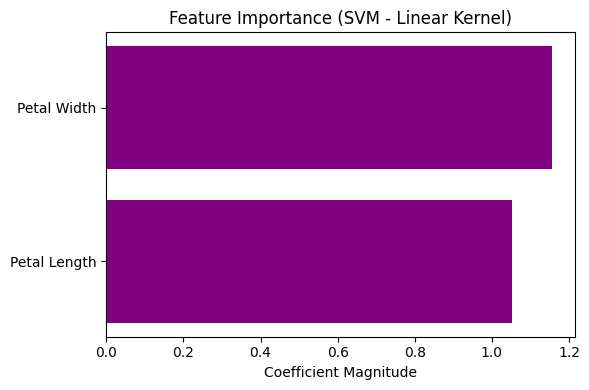

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Train a linear SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Get absolute value of coefficients as feature importance
# For multiclass, coef_ has shape (n_classes, n_features)
importance = np.abs(model.coef_).mean(axis=0)

# Feature names
features = ['Petal Length', 'Petal Width']

# Plotting
plt.figure(figsize=(6, 4))
plt.barh(features, importance, color='purple')
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance (SVM - Linear Kernel)")
plt.tight_layout()
plt.show()


Polynomial Kernel

Training accuracy: 0.952
Test accuracy: 1.000


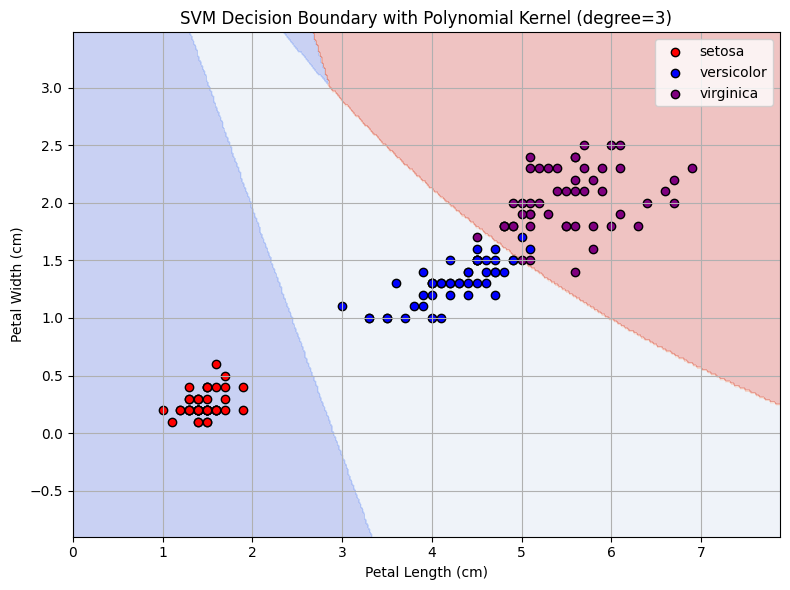

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target
target_names = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model with polynomial kernel
model = SVC(kernel='poly', degree=3, coef0=1, C=1.0)
model.fit(X_train, y_train)

# Print training and test accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

# Create mesh to plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Label each class with a unique color and name
colors = ['red', 'blue', 'purple']
for idx, class_name in enumerate(target_names):
    plt.scatter(X[y == idx, 0], X[y == idx, 1],
                c=colors[idx], label=class_name, edgecolors='k')

# Add labels and legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM Decision Boundary with Polynomial Kernel (degree=3)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Radial Kernel

Training accuracy: 0.962
Test accuracy: 1.000


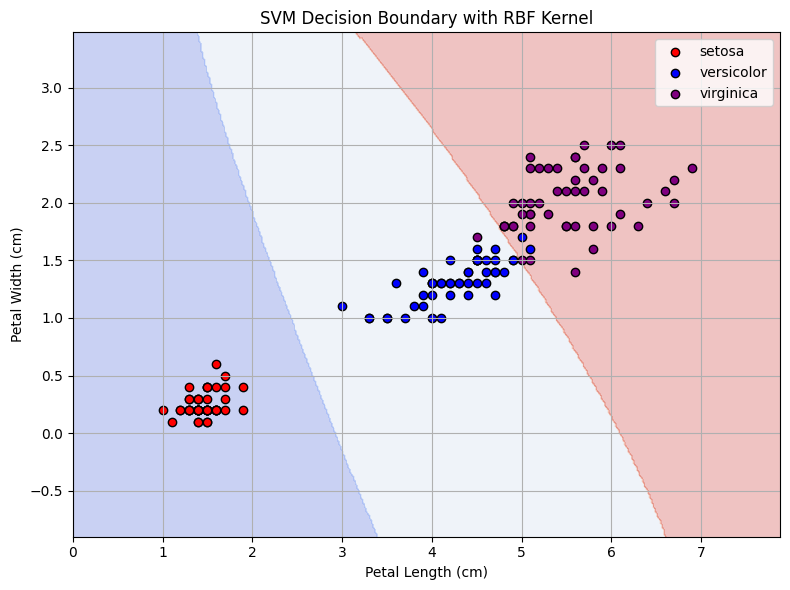

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target
target_names = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with RBF kernel
model = SVC(kernel='rbf', gamma='scale', C=1.0)
model.fit(X_train, y_train)

# Print training and test accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot each class with labels
colors = ['red', 'blue', 'purple']
for idx, class_name in enumerate(target_names):
    plt.scatter(X[y == idx, 0], X[y == idx, 1],
                c=colors[idx], label=class_name, edgecolors='k')

# Labels and legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
